In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

!pip install openpyxl
file_path = '/mnt/c/Users/tsimk/Downloads/research/H08/additional_data/GPWv4/gpw-v4-country-level-summary-rev11.xlsx'
df = pd.read_excel(file_path, engine='openpyxl', sheet_name=1, header=1)
result = df[['Country or Territory Name', 'Highest Admin Level Used', 'Number of Units']]
# 結果を表示
result.head(5)


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python3 -m pip install --upgrade pip


,Country or Territory Name,Highest Admin Level Used,Number of Units
0,Aruba,2,55
1,Afghanistan,2,401
2,Angola,2,161
3,Anguilla,0,1
4,Åland Islands,1,16


In [2]:
# fifth containes he comparison with middle criteria
text_path = '/mnt/c/Users/tsimk/Downloads/dotfiles/h08/camacity/dat/cty_lst_/create_text/camacity_fifth.txt'
columns = ['city_code', 'rank', 'status', 'type', 'latitude', 'longitude', 'city_name', 'wup_pop', 
           '5region_code', '5region_name', '17region_code', '17region_name', '22region_code', '22region_name', 
           'country_code', 'country_name', 'full_pop', 'clustered_pop', 'grids', 'administrative_level', 'input_size', 
           'Mcdonald2014', 'mainriver_count', 'distance', 'precision']
df_fifth = pd.read_csv(text_path, sep="|", header=None, names=columns)
print(len(df_fifth))
df_fifth.head(5)

1860


,city_code,rank,status,type,latitude,longitude,city_name,wup_pop,5region_code,5region_name,...,country_name,full_pop,clustered_pop,grids,administrative_level,input_size,Mcdonald2014,mainriver_count,distance,precision
0,21671,1,VALD,DOWN,35.689500,139.691710,Tokyo,36859.626,142,Asia,...,Japan,36855016.0,31821846.0,93.0,2,1751,True,4,63.190001173755135,0.817204
1,21228,2,VALD,FULL,28.666670,77.216670,Delhi,21987.895,142,Asia,...,India,22058268.0,22058266.0,39.0,3,5967,True,1,56.49560136366978,0.692308
2,20656,3,VALD,DOWN,31.222220,121.458060,Shanghai,20314.309,142,Asia,...,China,20277882.0,18339050.0,33.0,4,43878,True,3,99.83997662537448,0.969697
3,21853,4,VALD,FULL,19.427318,-99.141869,Ciudad de México (Mexico City),20136.681,19,Americas,...,Mexico,20178100.0,20178102.0,43.0,3,73613,True,2,98.71405766412326,0.860465
4,20287,5,VALD,DOWN,-23.547500,-46.636110,São Paulo,19659.808,19,Americas,...,Brazil,19608378.0,18857166.0,34.0,5,316461,True,1,92.87613267803071,0.911765


In [3]:
# filtering invalid cities
filtered_df = df_fifth[(df_fifth['status'] != 'RMVD') & (df_fifth['type'] != 'NoMK')]

# 指定したカラムを選択して新しい DataFrame を作成
columns_to_select = ['rank', 'wup_pop', 'administrative_level', 'precision', '22region_name']
middle_df = filtered_df[columns_to_select]

# 結果を表示
print(f'len(middle_df): {len(middle_df)}')
grouped = middle_df.groupby('22region_name')['precision'].agg(
    median_diff=('median'),  # 中央値を計算
    sample_size=('size')      # グループのサイズを計算
).reset_index()
desired_order = ['Northern America', 'Central America', 'Caribbean', 'South America',
                 'Northern Europe', 'Western Europe', 'Southern Europe', 'Eastern Europe',
                 'Northern Africa', 'Western Africa', 'Middle Africa', 'Southern Africa', 'Eastern Africa', 
                 'Central Asia', 'Western Asia', 'Southern Asia', 'South-eastern Asia', 'Eastern Asia',
                 'Australia and New Zealand', 'Melanesia']
grouped['22region_name'] = pd.Categorical(
    grouped['22region_name'], 
    categories=desired_order, 
    ordered=True
)
grouped = grouped.sort_values('22region_name')
print(grouped)
print(middle_df.head(5))

len(middle_df): 1604
                22region_name  median_diff  sample_size
10           Northern America     0.687500          148
2             Central America     0.433036           56
1                   Caribbean     0.428571            9
12              South America     0.519231          114
11            Northern Europe     0.666667           37
19             Western Europe     0.857143           55
16            Southern Europe     0.775253           50
6              Eastern Europe     0.607692          100
9             Northern Africa     0.500000           39
17             Western Africa     0.120773           64
8               Middle Africa     0.233696           20
14            Southern Africa     0.600000           15
4              Eastern Africa     0.055556           40
3                Central Asia     0.732323            8
18               Western Asia     0.243464           60
15              Southern Asia     0.200000          218
13         South-eastern As

In [19]:
#-------------------------------------------------------------------------------------
# change precision criteria
level=''
#level='_middle'
#level='_strict'
#-------------------------------------------------------------------------------------

# he insertion
precision_path = f'/mnt/c/Users/tsimk/Downloads/dotfiles/h08/camacity/dat/cty_lst_/he_validation{level}.txt'
columns = ['city_num', 'precision', 'True', 'False', 'grids']
df_he = pd.read_csv(precision_path, sep='|', header=None, names=columns)
print(f'len(df_he): {len(df_he)}')
print(df_he.head(5))

# replace
text_path = '/mnt/c/Users/tsimk/Downloads/dotfiles/h08/camacity/dat/cty_lst_/create_text/camacity_fifth.txt'
columns = ['city_code', 'rank', 'status', 'type', 'latitude', 'longitude', 'city_name', 'wup_pop', 
           '5region_code', '5region_name', '17region_code', '17region_name', '22region_code', '22region_name', 
           'country_code', 'country_name', 'full_pop', 'clustered_pop', 'grids', 'administrative_level', 'input_size', 
           'Mcdonald2014', 'mainriver_count', 'distance', 'precision']
df_fifth = pd.read_csv(text_path, sep="|", header=None, names=columns)
filtered_df = df_fifth[(df_fifth['status'] != 'RMVD') & (df_fifth['type'] != 'NoMK')]
new_df = filtered_df[['rank', 'wup_pop', 'administrative_level', 'precision', '22region_name']]
new_df = new_df.copy()
new_df['precision'] = df_he['precision'].values 

# grouping
grouped = new_df.groupby('22region_name')['precision'].agg(
    median_diff=('median'),  # 中央値を計算
    sample_size=('size')      # グループのサイズを計算
).reset_index()
desired_order = ['Northern America', 'Central America', 'Caribbean', 'South America',
                 'Northern Europe', 'Western Europe', 'Southern Europe', 'Eastern Europe',
                 'Northern Africa', 'Western Africa', 'Middle Africa', 'Southern Africa', 'Eastern Africa', 
                 'Central Asia', 'Western Asia', 'Southern Asia', 'South-eastern Asia', 'Eastern Asia',
                 'Australia and New Zealand', 'Melanesia']
grouped['22region_name'] = pd.Categorical(
    grouped['22region_name'], 
    categories=desired_order, 
    ordered=True
)
grouped = grouped.sort_values('22region_name')
print(f'len(new_df): {len(new_df)}')
print(new_df.head(5))
print(grouped)

len(df_he): 1604
   city_num  precision  True  False  grids
0         1   0.913978    85      8     93
1         2   0.897436    35      4     39
2         3   1.000000    33      0     33
3         4   1.000000    43      0     43
4         5   0.970588    33      1     34
len(new_df): 1604
   rank    wup_pop  administrative_level  precision    22region_name
0     1  36859.626                     2   0.913978     Eastern Asia
1     2  21987.895                     3   0.897436    Southern Asia
2     3  20314.309                     4   1.000000     Eastern Asia
3     4  20136.681                     3   1.000000  Central America
4     5  19659.808                     5   0.970588    South America
                22region_name  median_diff  sample_size
10           Northern America     0.875000          148
2             Central America     0.750000           56
1                   Caribbean     0.571429            9
12              South America     0.800000          114
11           

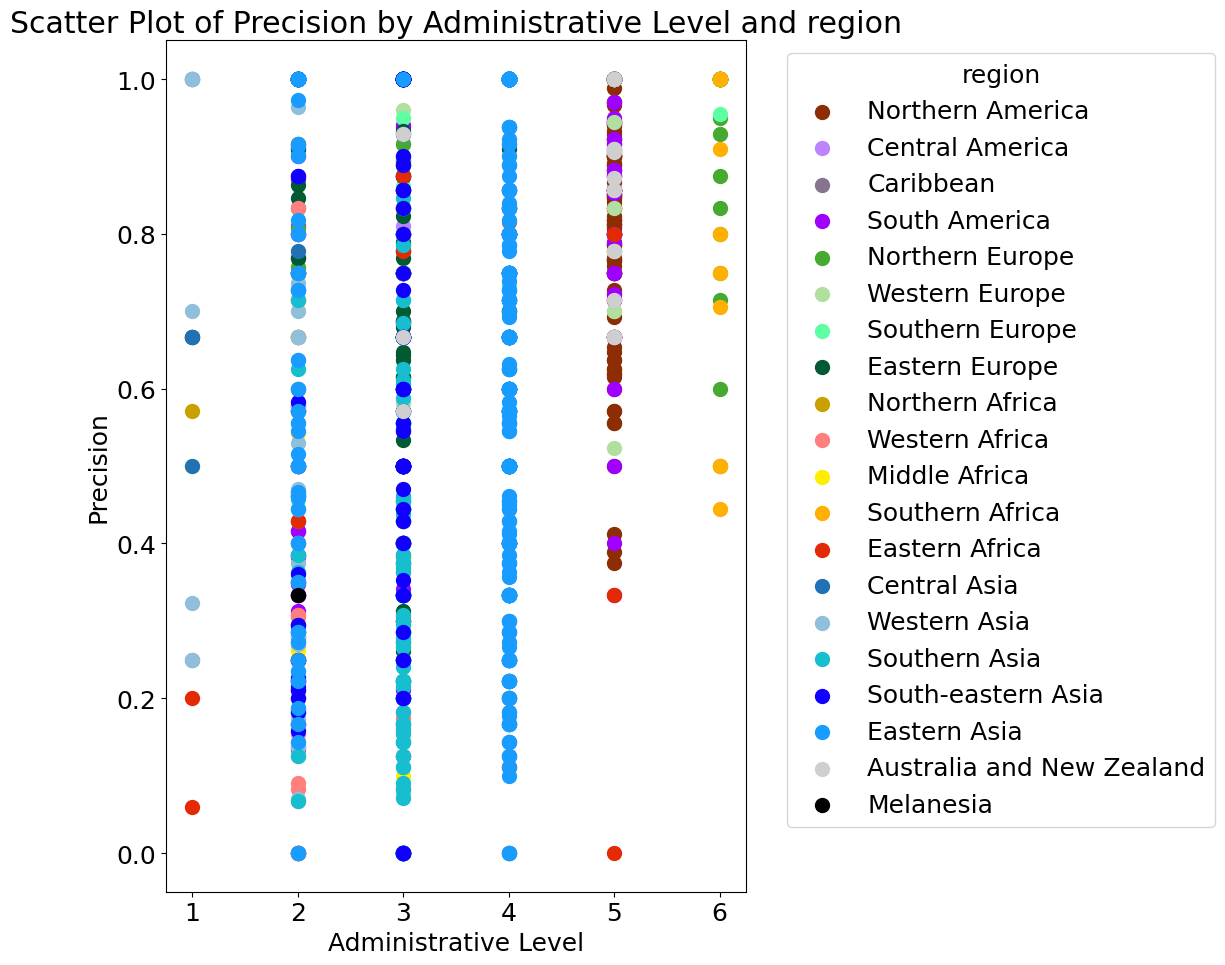

In [20]:
# label order
label_order = [
    'Northern America', 
    'Central America', 
    'Caribbean', 
    'South America', 
    'Northern Europe', 
    'Western Europe',
    'Southern Europe', 
    'Eastern Europe', 
    'Northern Africa', 
    'Western Africa', 
    'Middle Africa',
    'Southern Africa',
    'Eastern Africa', 
    'Central Asia', 
    'Western Asia',
    'Southern Asia',
    'South-eastern Asia',
    'Eastern Asia', 
    'Australia and New Zealand', 
    'Melanesia', 
]
# カラーマッピング
colors = {
    'Australia and New Zealand': '#cfcfcf', 
    'Melanesia': '#000000', 
    'Northern America': '#8c2d04', 
    'Central America': '#880092', 
    'Caribbean': '#85748f', 
    'Central America': '#bc84ff', 
    'South America': '#a000ff', 
    'Eastern Asia': '#199cff', 
    'Central Asia': '#2171b5', 
    'South-eastern Asia': '#1100ff', 
    'Southern Asia': '#17becf', 
    'Western Asia': '#8fbfda', 
    'Eastern Africa': '#e32a05', 
    'Middle Africa': '#ffee01', 
    'Northern Africa': '#caa000', 
    'Southern Africa': '#ffb000', 
    'Western Africa': '#ff7f7f', 
    'Eastern Europe': '#005a32', 
    'Northern Europe': '#46aa30', 
    'Western Europe': '#b0df9f',
    'Southern Europe': '#5effa4', 
}
# front order
zorders = {
    'Australia and New Zealand': 3, 
    'Melanesia': 3, 
    'Caribbean': 7, 
    'Northern America': 2, 
    'Central America': 7, 
    'South America': 1, 
    'Central Asia': 4, 
    'Eastern Asia': 6, 
    'South-eastern Asia': 4, 
    'Southern Asia': 9, 
    'Western Asia': 8, 
    'Eastern Africa': 10, 
    'Middle Africa': 10, 
    'Northern Africa': 12, 
    'Southern Africa': 10, 
    'Western Africa': 12, 
    'Eastern Europe': 11, 
    'Northern Europe': 5, 
    'Southern Europe': 5, 
    'Western Europe': 5,
}

# 散布図の作成
plt.rcParams.update({'font.size': 18}) 
# 散布図の作成
plt.figure(figsize=(12, 10))
marker_size = 100

# 各 region ごとにプロット
for region in label_order:
    subset = new_df[new_df['22region_name'] == region]
    if not subset.empty:
        plt.scatter(
            subset['administrative_level'],  # 必要に応じて列名を調整
            subset['precision'],  # 必要に応じて列名を調整
            s=marker_size,  # サイズを固定値に設定
            color=colors.get(region, 'gray'),  # 指定された色、デフォルトは灰色
            label=region,
            alpha=1.0
        )

# 軸ラベルとタイトル
plt.xlabel('Administrative Level')
plt.ylabel('Precision')
plt.title('Scatter Plot of Precision by Administrative Level and region')

# 凡例の設定
plt.legend(title='region', bbox_to_anchor=(1.05, 1), loc='upper left')

# グラフのレイアウト調整
plt.grid(False)
plt.tight_layout()

# グラフを表示
plt.show()

Eastern Asia 406 1
Southern Asia 204 3
Central America 53 3
South America 58 20
Northern America 148 148
Northern Africa 27 1
Western Asia 39 8
South-eastern Asia 71 20
Eastern Europe 62 1
Western Europe 26 4
Western Africa 55 4
Middle Africa 12 1
Northern Europe 26 1
Southern Europe 28 2
Southern Africa 14 1
Australia and New Zealand 11 3
Eastern Africa 26 2
Caribbean 5 2
Central Asia 4 4
Melanesia 1 1


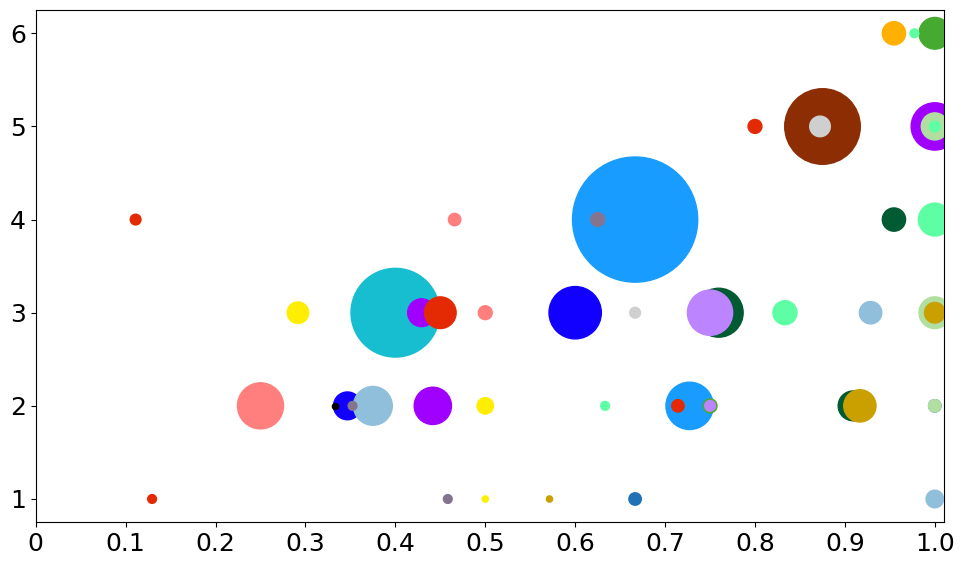

In [28]:
zorders = {
    'Australia and New Zealand': 3, 
    'Melanesia': 15, 
    'Caribbean': 15, 
    'Northern America': 1, 
    'Central America': 14, 
    'South America': 2, 
    'Central Asia': 1, 
    'Eastern Asia': 1, 
    'South-eastern Asia': 2, 
    'Southern Asia': 2, 
    'Western Asia': 8, 
    'Eastern Africa': 10, 
    'Middle Africa': 10, 
    'Northern Africa': 12, 
    'Southern Africa': 10, 
    'Western Africa': 12, 
    'Eastern Europe': 1, 
    'Northern Europe': 5, 
    'Southern Europe': 5, 
    'Western Europe': 5,
}


# 散布図の作成
plt.rcParams.update({'font.size': 18}) 
plt.figure(figsize=(10, 6))

# 各 region ごとにプロット
regions = new_df['22region_name'].unique()  # 'region'を'Region'に修正
for region in regions:
    # 指定したregionのデータを抽出
    subset = new_df[new_df['22region_name'] == region]
    # administrative levelごとの中央値
    grouped =  subset.groupby('administrative_level')['precision'].agg(['median', 'count']).reset_index()
    #grouped['bubble_size'] = grouped['count'].apply(lambda x: x*10 if x > 20 else 200)
    grouped['bubble_size'] = grouped['count'].apply(lambda x: x*20)
    print(region, np.max(grouped['count']), np.min(grouped['count']))
    
    plt.scatter(
        grouped['median'],
        grouped['administrative_level'],
        s=grouped['bubble_size'],
        color=colors.get(region, 'gray'),
        label=region,
        alpha=1,
        zorder=zorders.get(region, 1)  # 最前面に設定
    )

# 凡例の設定
#plt.legend(title='region', bbox_to_anchor=(1.05, 1), loc='upper left')
xaxis = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
plt.xticks(xaxis, xaxis)
plt.xlim(0.0, 1.01)

# グラフのレイアウト調整
plt.grid(False)
plt.tight_layout()

# グラフを表示
plt.show()

Eastern Asia 406 1
Southern Asia 204 3
Central America 53 3
South America 58 20
Northern America 148 148
Northern Africa 27 1
Western Asia 39 8
South-eastern Asia 71 20
Eastern Europe 62 1
Western Europe 26 4
Western Africa 55 4
Middle Africa 12 1
Northern Europe 26 1
Southern Europe 28 2
Southern Africa 14 1
Australia and New Zealand 11 3
Eastern Africa 26 2
Caribbean 5 2
Central Asia 4 4
Melanesia 1 1


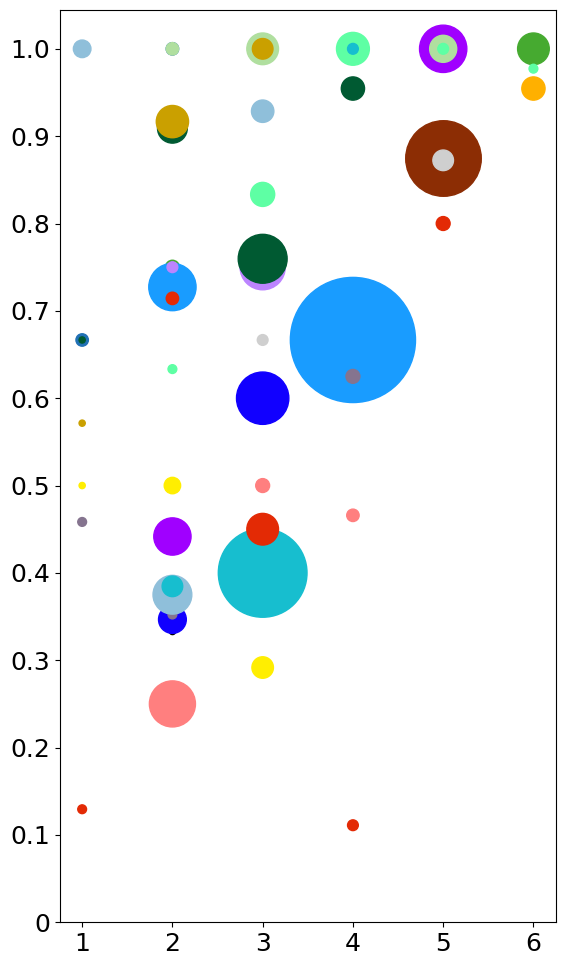

In [26]:
zorders = {
    'Australia and New Zealand': 3, 
    'Melanesia': 3, 
    'Caribbean': 7, 
    'Northern America': 2, 
    'Central America': 7, 
    'South America': 2, 
    'Central Asia': 4, 
    'Eastern Asia': 1, 
    'South-eastern Asia': 1, 
    'Southern Asia': 2, 
    'Western Asia': 8, 
    'Eastern Africa': 10, 
    'Middle Africa': 10, 
    'Northern Africa': 12, 
    'Southern Africa': 10, 
    'Western Africa': 12, 
    'Eastern Europe': 5, 
    'Northern Europe': 5, 
    'Southern Europe': 5, 
    'Western Europe': 5,
}
# 散布図の作成
plt.rcParams.update({'font.size': 18}) 
plt.figure(figsize=(6, 10))

# 各 region ごとにプロット
regions = new_df['22region_name'].unique()  # 'region'を'Region'に修正
for region in regions:
    # 指定したregionのデータを抽出
    subset = new_df[new_df['22region_name'] == region]
    # administrative levelごとの中央値
    grouped =  subset.groupby('administrative_level')['precision'].agg(['median', 'count']).reset_index()
    #grouped['bubble_size'] = grouped['count'].apply(lambda x: x*10 if x > 20 else 200)
    grouped['bubble_size'] = grouped['count'].apply(lambda x: x*20)
    print(region, np.max(grouped['count']), np.min(grouped['count']))
    
    plt.scatter(
        grouped['administrative_level'],
        grouped['median'],
        s=grouped['bubble_size'],
        color=colors.get(region, 'gray'),
        label=region,
        alpha=1,
        zorder=zorders.get(region, 1)  # 最前面に設定
    )

# 凡例の設定
#plt.legend(title='region', bbox_to_anchor=(1.05, 1), loc='upper left')
yaxis = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
plt.yticks(yaxis, yaxis)

# グラフのレイアウト調整
plt.grid(False)
plt.tight_layout()

# グラフを表示
plt.show()

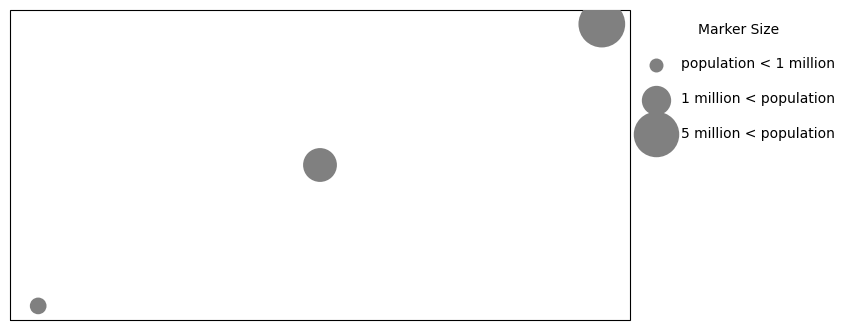

In [7]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# プロットするデータ
pprf_lon = [10, 20, 30]
pprf_lat = [50, 55, 60]
pop_size = [100, 500, 1000]  # マーカーサイズ

# figureのセットアップ
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(8, 6))

# scatter plot
scatter = ax.scatter(
    pprf_lon, pprf_lat, s=pop_size,  
    color='grey', linewidths=2, transform=ccrs.PlateCarree(), zorder=3
)

# プロキシアーティストを作成 (凡例用)
sizes = [80, 400, 1000]
labels = ['population < 1 million', '1 million < population', '5 million < population']

# 凡例用の空のプロットを作成
for size, label in zip(sizes, labels):
    plt.scatter([], [], s=size, color='grey', linewidths=1.1, label=label)

# 凡例の設定
ax.legend(
    scatterpoints=1, frameon=False, labelspacing=1.5, title="Marker Size",
    loc='upper left', bbox_to_anchor=(1, 1)  # 図の右上に凡例を配置
)

# プロット表示
plt.show()
